# Часть 1

---

<h3 style="text-align: center;"><b>Convolution and pooling operations</b></h3>

---

### Convolution (свёртка)

На этом занятии мы посмотрим, как свёртки влияют на изображение и попрактикуемся в вычислении свёрток и пулингов от различных изображений.

Для начала напомним, что такое свёртка:

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

*https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif*

То есть мы берём фильтр размера FxF, умножаем его на область изображения размером FxF поэлементно, складываем получившиеся поэлемнетные произведения и записываем это число в результирующий тензор.

За исключением архитектур типа MobileNet, третья размерность фильтра всегда свопадает с третьей размерностью входного тензора. Если картинка размера HxWx3, то фильтр будет иметь размер FxFx3, и поэлементное произведение будет производиться по всему объёму.

Напомним два важных параметра операции свертки:

stride -- это размер шага окна свёртка по осям x и y (обычно совпадают, но вполне могут быть и разными).

$padding$ -- это окружение картинки по краям нулями (или чем-то другим) для того, чтобы придать изображению после свёртки нужный размер (пэддинг делается до свёртки).

---

Посмотрим на то, как применение свёртки с определёнными фильтрами влияет на изображение. На этот счёт есть хорошая статья на Хабрахабре:  

https://habr.com/post/142818/

Возьмём код из статьи и посмотрим, как будет меняться картинка в зависимости от фильтра:

In [6]:
! wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2025-05-16 12:41:55--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2025-05-16 12:41:56 (4.60 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



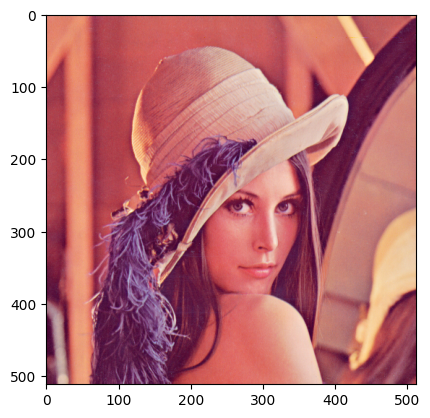

In [8]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

#https://habrahabr.ru/post/142818/

# Функция для проверки значения байта (ограничение диапазона от 0 до 255)
def checkByte(a):
    # Если значение больше 255, ограничиваем его до 255
    if a > 255:
        a = 255
    # Если значение меньше 0, ограничиваем его до 0
    if a < 0:
        a = 0
    # Возвращаем значение в допустимом диапазоне
    return a


# Функция для вычисления свертки двух матриц
def conv(a, b):
    # Инициализация переменной для хранения суммы произведений элементов
    sum = 0
    # Проходим по всем строкам матрицы a
    for i in range(len(a)):
        # Проходим по всем столбцам матрицы a
        for j in range(len(a[0])):
            # Умножаем соответствующие элементы матриц a и b и добавляем результат к сумме
            sum += a[i][j] * b[i][j]
    # Возвращаем итоговую сумму
    return sum


# Функция для вычисления медианы элементов матрицы
def median(a):
    # Создаем пустой список для хранения всех элементов матрицы
    c = []
    # Проходим по всем строкам матрицы a
    for i in range(len(a)):
        # Проходим по всем столбцам матрицы a
        for j in range(len(a[0])):
            # Добавляем каждый элемент матрицы в список c
            c.append(a[i][j])
    # Сортируем список c по возрастанию
    c.sort()
    # Возвращаем медианный элемент (центральный элемент отсортированного списка)
    return c[ceil(len(c)/2)]


# Функция для нахождения максимального значения в матрице
def max(a):
    # Создаем пустой список для хранения всех элементов матрицы
    c = []
    # Проходим по всем строкам матрицы a
    for i in range(len(a)):
        # Проходим по всем столбцам матрицы a
        for j in range(len(a[0])):
            # Добавляем каждый элемент матрицы в список c
            c.append(a[i][j])
    # Сортируем список c по возрастанию
    c.sort()
    # Возвращаем последний элемент отсортированного списка (максимальное значение)
    return c[len(c)-1]


# Функция для нахождения минимального значения в матрице
def min(a):
    # Создаем пустой список для хранения всех элементов матрицы
    c = []
    # Проходим по всем строкам матрицы a
    for i in range(len(a)):
        # Проходим по всем столбцам матрицы a
        for j in range(len(a[0])):
            # Добавляем каждый элемент матрицы в список c
            c.append(a[i][j])
    # Сортируем список c по возрастанию
    c.sort()
    # Возвращаем первый элемент отсортированного списка (минимальное значение)
    return c[0]


# Открываем изображение с помощью библиотеки PIL
im = Image.open('./Lenna_(test_image).png')
# Загружаем пиксели изображения для дальнейшей обработки
pixels = im.load()

# Отображаем изображение с помощью библиотеки matplotlib
plt.imshow(im);

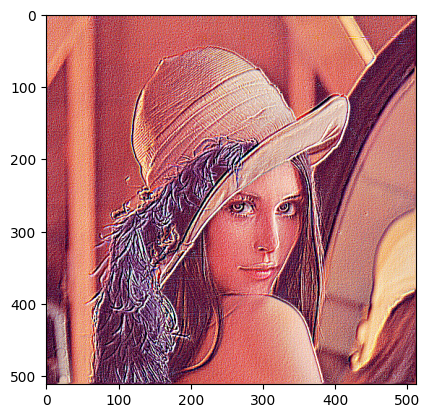

In [9]:
# Создаем копию исходного изображения для дальнейшей обработки
imFinal = im.copy()
# Загружаем пиксели скопированного изображения
pixels2 = imFinal.load()

# Определяем фильтр (матрица свертки), который будет применяться к изображению
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]

# Примеры других фильтров закомментированы. Вы можете раскомментировать любой из них для использования.
'''
filter = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]
'''

# Вычисляем сумму всех элементов фильтра
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]

# Если сумма элементов фильтра равна 0, устанавливаем делитель равным 1,
# чтобы избежать деления на ноль
if div == 0:
    div = 1

# Проходим по всем пикселям изображения, исключая края,
# чтобы можно было применить фильтр без выхода за границы изображения
for i in range(floor(len(filter)/2), im.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), im.height - floor(len(filter)/2)):
        # Создаем матрицы для хранения значений каналов R, G и B
        matrR = []
        matrG = []
        matrB = []

        # Для каждого пикселя собираем окрестность размером с фильтр
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                # Получаем значения RGB для текущего пикселя в окрестности
                r, g, b = pixels[i + n, j + m]
                # Добавляем значения в соответствующие списки
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            # Добавляем строки в матрицы каналов
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        # Применяем свертку (conv) к матрицам каналов с использованием фильтра
        # Результат делим на сумму элементов фильтра (div) и округляем
        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))

        # Альтернативный вариант: использование минимальных значений в окрестности
        # r = checkByte(min(matrR))
        # g = checkByte(min(matrG))
        # b = checkByte(min(matrB))

        # Пример бинаризации изображения (закомментировано)
        '''
        if r < 512:
            pixels2[i, j] = (255, 255, 255)
        else:
            pixels2[i, j] = (0, 0, 0)
        '''

        # Устанавливаем новые значения RGB для текущего пикселя
        pixels2[i, j] = (r, g, b)

# Отображаем обработанное изображение
plt.imshow(imFinal);

### Pooling

Pooling (пулинг) -- операция, нужная для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:

<img src="https://i.stack.imgur.com/W9a9n.jpg">

*https://i.stack.imgur.com/W9a9n.jpg*

Примеры применения max и avg pooling'ов:


<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

*https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png*

Если на вход подаётся изображение с несколькими каналами, то пулинг берётся по каналам, то есть если это цветная картинка HxWxC, и мы применяем к ней pooling 2x2, то получим на выходе (H // 2) x (W // 2) x C

Эта операция весьма простая, но лучше разобрать несколько примеров (см. на доску).

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета:  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам свёрточных нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/convolutional-networks/  
http://cs231n.github.io/understanding-cnn/  
http://cs231n.github.io/transfer-learning/

4). Видео о Computer Vision от Andrej Karpathy: https://www.youtube.com/watch?v=u6aEYuemt0M

# Часть 2

In [10]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Сгенерируем датасет Игрушка Дьявола

In [11]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

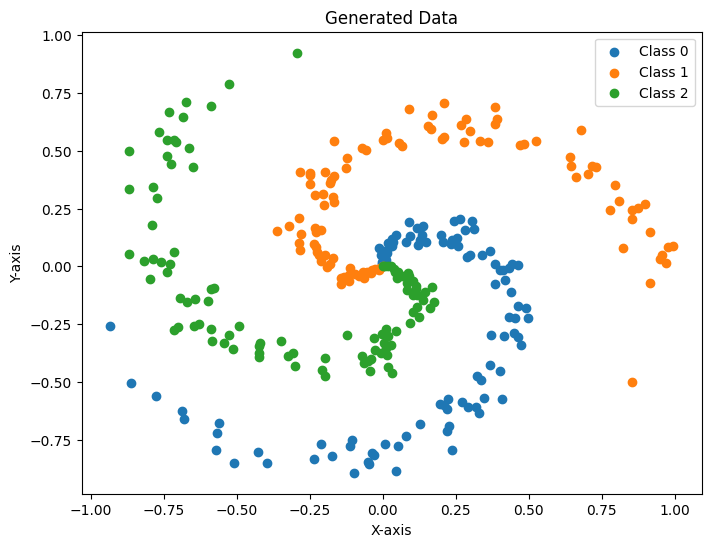

In [12]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

# Визуализация данных
plt.figure(figsize=(8, 6))
for j in range(K):
    plt.scatter(X[y == j][:, 0], X[y == j][:, 1], label=f'Class {j}')
plt.legend()
plt.title('Generated Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [13]:
# Преобразование данных в тензоры PyTorch
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

Сейчас мы хотим научиться самостоятельно создавать наследников nn.Module. До этого мы делали нейросети с помощью класса nn.Sequential, попробуем построить такую же сеть самостоятельно.

In [14]:
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв (количество нейронов в скрытом слое);
# D_out - размерность выходного слоя (количество классов для классификации)
D_in, H, D_out = 2, 100, 3

# Используем пакет `torch.nn` для определения модели и функции потерь.
two_layer_net = torch.nn.Sequential(
    # Первый линейный слой: преобразует входные данные размерности D_in в скрытое представление размерности H
    torch.nn.Linear(D_in, H),

    # Функция активации ReLU (Rectified Linear Unit): добавляет нелинейность в модель
    # ReLU оставляет положительные значения без изменений и обнуляет отрицательные
    torch.nn.ReLU(),

    # Второй линейный слой: преобразует скрытое представление размерности H в выходное представление размерности D_out
    torch.nn.Linear(H, D_out),

    # Функция Softmax: преобразует выходные значения в вероятности для каждого класса
    # Softmax гарантирует, что сумма всех выходных значений будет равна 1
    torch.nn.Softmax(dim=1)  # dim=1 указывает, что Softmax применяется по строкам (по классам)
)

Что такое модуль и как он устроен? Во-первых, модуль это такой строительный блок для нейронок, с помощью модуля можно задать любую дифференциируемую по своему параметру функцию. Применяются модули так же, как и обычные функции с синтаксисом
> module_instance(var1, var2)

При этом внутри вызывается функция forward с теми же аргументами, а ее выход возвращается как результат вызова модуля. Зачем же нужно так странно оборачивать обычные функции в модули?

* Это позволяет очень удобно следить за параметрами, которые надо изменять. Когда мы хоти получить все параметры можно просто рекурсивно пройтись по всем полям модели, посмотреть, какие из ни параметры сами по себе, а какие являются модулями и содрежат параметры внутри, а потом все это собрать.

_По этой причине если вы используете внутри своего модуля какие-то еще модули их надо класть просто в поле класса, если это единичный модуль, и в класс **nn.ModuleList** или **nn.ModuleDict**, если у вас список или словарь используемых модулей. Если же в модели у вас есть како-то собственный вес, то недостаточно положить тензор в поле класса, его надо обернуть в **nn.Parameter, nn.ParameterList** или **nn.ParameterDict** в зависимотси от того, что именно у вас._

* Такая организация позволяет достаточно безболезненно расширять PyTorch и писать для него свои функции, которые нельзя выразить композицией уже существующих. Пригождается это редко, поэтому сегодня мы не будем писать свое расширение.

* Код, разделенный на модули, это просто красиво.

In [15]:
# НОВАЯ СЕТЬ
# Определение пользовательской модели как подкласса nn.Module
class MyModule(nn.Module):
    def __init__(self):
        # Вызов конструктора родительского класса
        super().__init__()

        # Первый линейный слой: преобразует входные данные размерности D_in в скрытое представление размерности H
        self.f_lin = nn.Linear(D_in, H)

        # Второй линейный слой: преобразует скрытое представление размерности H в выходное представление размерности D_out
        self.s_lin = nn.Linear(H, D_out)

    def forward(self, X):
        # Применение первого линейного слоя и функции активации ReLU
        X = F.relu(self.f_lin(X))

        # Применение второго линейного слоя и функции Softmax для получения вероятностей
        return F.softmax(self.s_lin(X), dim=1)  # dim=1 указывает, что Softmax применяется по строкам (по классам)

# Создание экземпляра модели
model = MyModule()

# Определение функции потерь
loss_fn = nn.CrossEntropyLoss()  # CrossEntropyLoss используется для задач многоклассовой классификации

# Определение оптимизатора
optim = torch.optim.Adam(model.parameters(), lr=1e-1)  # Adam — это адаптивный метод оптимизации с шагом обучения 0.1

Поговорим немного подробнее о `softmax` и `CrossEntropyLoss`.

Напоминание: softmax-функция выглядит следующим образом
$$Softmax(x) = \begin{pmatrix}
\dfrac{e^{x_1}}{\sum\limits_{i=0}^{m} e^{x_i}},\; \dots,\; \dfrac{e^{x_m}}{\sum\limits_{i=0}^{m} e^{x_i}}
\end{pmatrix} $$

Таким образом, после применения softmax-функции мы получили вектор чисел из интервала $(0, 1)$, которые мы будем интерпретировать как вероятности классов.

Аналогично тому, как мы обощили сигмоиду на многоклассовый случай и получили softmax, можно обобщить и функцию потерь, получив _кросс-энтропию_:

$$CrossEntropy(x) = -\sum\limits_{i=0}^m y_i \cdot log(Softmax(x)_i), $$

где $y_i$ – истинная метка класса ($1$ если $x$ принадлежит $i$-ому классу и $0$ иначе)

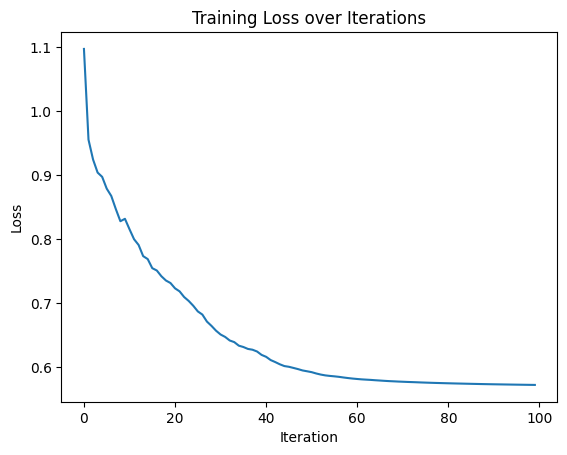

In [16]:
# Создаем пустой список для хранения значений функции потерь на каждой итерации
losses = []

# Цикл обучения модели на 100 итераций (эпох)
for t in range(100):
    # --- Forward pass (прямой проход) ---
    # Прогоняем входные данные X через модель, чтобы получить предсказания y_pred
    y_pred = model(X)

    # --- Вычисление функции потерь ---
    # Сравниваем предсказания модели (y_pred) с истинными метками (y) с помощью функции потерь
    loss = loss_fn(y_pred, y)

    # Сохраняем текущее значение функции потерь в список (для последующего анализа)
    losses.append(loss.item())  # loss.item() преобразует тензор с одним значением в обычное число (float)

    # --- Backward pass (обратный проход) ---
    # Обнуляем градиенты перед вычислением новых градиентов
    optim.zero_grad()

    # Вычисляем градиенты функции потерь по параметрам модели
    loss.backward()

    # --- Обновление параметров модели ---
    # Обновляем параметры модели (веса и смещения) с помощью оптимизатора
    optim.step()

# Визуализация значений функции потерь
plt.plot(losses)  # Строим график зависимости значений функции потерь от номера итерации
plt.xlabel('Iteration')  # Подпись оси X: номер итерации
plt.ylabel('Loss')       # Подпись оси Y: значение функции потерь
plt.title('Training Loss over Iterations')  # Заголовок графика
plt.show()  # Отображаем график

Теперь посмотрим, что будет, если не положить используемые внутри слои в self

In [17]:
# Сеть без параметров

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()

        # Создаем список линейных слоев (не регистрируя их как параметры модели)
        self.linear_layers = [nn.Linear(D_in, H), nn.Linear(H, D_out)]

        # Создаем "бесполезный" смещение (bias) вручную
        # requires_grad=True указывает, что этот тензор будет участвовать в вычислении градиентов
        self.my_useless_bias = torch.ones(1, H, requires_grad=True)

        # Создаем список дополнительных "бесполезных" смещений
        # Они также имеют requires_grad=True, но не используются в forward-проходе
        self.more_of_my_useless_biases = [
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True)
        ]

    def forward(self, X):
        # Применяем первый линейный слой и функцию активации ReLU
        X = F.relu(self.linear_layers[0](X))

        # Добавляем "бесполезное" смещение к выходу первого слоя
        X += self.my_useless_bias

        # Применяем второй линейный слой и функцию Softmax для получения вероятностей
        return F.softmax(self.linear_layers[1](X))

# Создаем экземпляр модели
model = MyModule()

# Выводим список параметров модели
list(model.parameters())

[]

Как мы и ожидали параметров нет. Исправим это.

In [18]:
# Исправленная сеть с параметрами

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()

        # Создаем список линейных слоев с помощью nn.ModuleList
        # nn.ModuleList регистрирует каждый слой как параметр модели
        self.linear_layers = nn.ModuleList([nn.Linear(D_in, H), nn.Linear(H, D_out)])

        # Создаем "бесполезное" смещение (bias) и регистрируем его как параметр модели
        # nn.Parameter явно указывает, что этот тензор является обучаемым параметром
        self.my_useless_bias = nn.Parameter(torch.ones(1, H, requires_grad=True))

        # Создаем список дополнительных "бесполезных" смещений с помощью nn.ParameterList
        # nn.ParameterList регистрирует каждый тензор как параметр модели
        self.more_of_my_useless_biases = nn.ParameterList([
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True))
        ])

    def forward(self, X):
        # Применяем первый линейный слой и функцию активации ReLU
        X = F.relu(self.linear_layers[0](X))

        # Добавляем "бесполезное" смещение к выходу первого слоя
        X += self.my_useless_bias

        # Добавляем все "бесполезные" смещения из списка self.more_of_my_useless_biases
        for b in self.more_of_my_useless_biases:
            X += b

        # Применяем второй линейный слой и функцию Softmax для получения вероятностей
        return F.softmax(self.linear_layers[1](X))

# Создаем экземпляр модели
model = MyModule()

# Выводим список параметров модели
list(model.parameters())

[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([[-0.6213,  0.3391],
         [-0.6798, -0.3639],
         [-0.1372,  0.3248],
         [ 0.2011, -0.0105],
         [ 0.5699,  0.0875],
         [ 0.4033,  0.1731],
         [-0.3763, -0.0687],
         [ 0.1560,  0.2434],
         [ 0.6510, -0.0277],
         [ 0.0190, -0.4908],
         [ 0.2359,  0.1494],
         [ 0.5198,  0.5473],
         [-0.1929,  0.6737],
         [ 0.4834, -0.3507],
         [ 0.3613,  0.6235],
         [-0.6074, -0.5768],
       

Как мы и хотели, все параметры появились

# Часть 3


Теперь мы научимся писать свои свёрточные нейросети на фреймворке PyTorch, и протестируем их работу на датасетах MNIST и CIFAR10.

***Свёрточная нейросеть (Convolutional Neural Network, CNN)*** - это многослойная нейросеть, имеющая в своей архитектуре помимо *полносвязных слоёв* (а иногда их может и не быть) ещё и **свёрточные слои (Conv Layers)** и **pooling-слои (Pool Layers)**.  

Собственно, название такое эти сети получили потому, что в основе их работы лежит операция **свёртки**.


Сразу же стоит сказать, что свёрточные нейросети **были придуманы прежде всего для задач, связанных с картинками**, следовательно, на вход они тоже "ожидают" картинку.

Расмотрим их устройство более подробно:

* Вот так выглядит неглубокая свёрточная нейросеть, имеющая такую архитектуру:  
`Input -> Conv 5x5 -> Pool 2x2 -> Conv 5x5 -> Pool 2x2 -> FC -> Output`

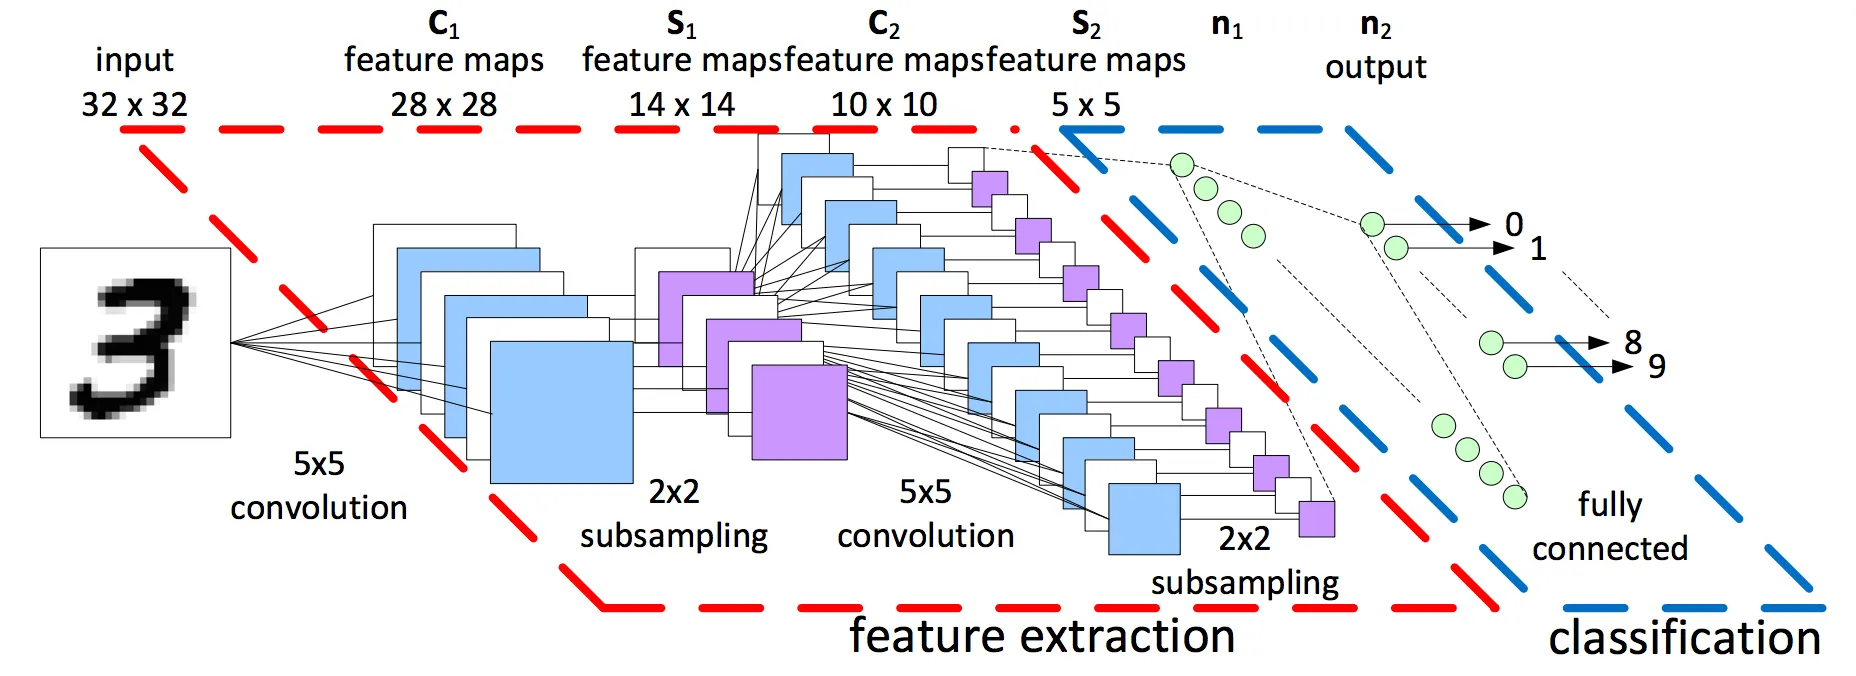

Свёрточные нейросети (обыкновенные, есть и намного более продвинутые) почти всегда строятся по следующему правилу:  

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`  

то есть:  

1). ***Входной слой*** (batch картинок `HxWxC`)  

2). $M$ блоков (M $\ge$ 0) из свёрток и pooling-ов, причём именно в том порядке, как в формуле выше. Все эти $M$ блоков вместе называют ***feature extractor*** свёрточной нейросети, потому что эта часть сети отвечает непосредственно за формирование новых, более сложных признаков, поверх тех, которые подаются (то есть, по аналогии с MLP, мы опять же переходим к новому признаковому пространству, однако здесь оно строится сложнее, чтем в обычных многослойных сетях, поскольку используется операция свёртки)  

3). $K$ штук FullyConnected-слоёв (с активациями). Эту часть из $K$ FC-слоёв называют ***classificator***, поскольку эти слои отвечают непосредственно за предсказание нужно класса (сейчас рассматривается задача классификации изображений).

<h3 style="text-align: center;"><b>Свёрточная нейросеть на PyTorch</b></h3>

Ешё раз напомню про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Так как мы сейчас рассматриваем **архитектуру CNN**, то, помимо этих компонент, в свёрточной нейросети можно настроить следующие вещи:  

- (в каждом ConvLayer) **размер фильтров (окна свёртки)** (`kernel_size`)
- (в каждом ConvLayer) **количество фильтров** (`out_channels`)  
- (в каждом ConvLayer) размер **шага окна свёртки (stride)** (`stride`)  
- (в каждом ConvLayer) **тип padding'а** (`padding`)  


- (в каждом PoolLayer) **размер окна pooling'a** (`kernel_size`)  
- (в каждом PoolLayer) **шаг окна pooling'а** (`stride`)  
- (в каждом PoolLayer) **тип pooling'а** (`pool_type`)  
- (в каждом PoolLayer) **тип padding'а** (`padding`)

Какими их берут обычно -- будет показано в примере ниже. По крайней мере, можете стартовать с этих настроек, чтобы понять, какое качество "из коробки" будет у простой модели.

Посмотрим, как работает CNN на MNIST'е и на CIFAR'е.

In [19]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt  # для отрисовки картиночек
%matplotlib inline

# Проверяем, доступны ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

**MNIST:** это набор из 70k картинок рукописных цифр от 0 до 9, написанных людьми, 60k из которых являются тренировочной выборкой (`train` dataset)), и ещё 10k выделены для тестирования модели (`test` dataset).

Скачаем и загрузим в `loader`'ы:

**Обратите внимание на аргумент `batch_size`:** именно он будет отвечать за размер батча, который будет подаваться при оптимизации нейросети

In [20]:
# Определение преобразований для данных
transform = transforms.Compose(
    [transforms.ToTensor()]
)

# Загрузка обучающего набора данных MNIST
trainset = torchvision.datasets.MNIST(
    root='./data',          # Путь, куда будут загружены данные
    train=True,             # Указывает, что это обучающий набор данных
    download=True,          # Если данные еще не загружены, они будут загружены автоматически
    transform=transform     # Применяемые преобразования к данным (в данном случае - преобразование в тензор)
)

# Создание загрузчика данных для обучающего набора
trainloader = torch.utils.data.DataLoader(
    trainset,               # Набор данных
    batch_size=4,           # Размер батча (количество образцов в одной итерации)
    shuffle=True,           # Перемешивание данных перед каждой эпохой (для лучшей обобщающей способности)
    num_workers=2           # Количество подпроцессов для загрузки данных (ускоряет загрузку)
)

# Загрузка тестового набора данных MNIST
testset = torchvision.datasets.MNIST(
    root='./data',          # Путь, куда будут загружены данные
    train=False,            # Указывает, что это тестовый набор данных
    download=True,          # Если данные еще не загружены, они будут загружены автоматически
    transform=transform     # Применяемые преобразования к данным (в данном случае - преобразование в тензор)
)

# Создание загрузчика данных для тестового набора
testloader = torch.utils.data.DataLoader(
    testset,                # Набор данных
    batch_size=4,           # Размер батча (количество образцов в одной итерации)
    shuffle=False,          # Тестовые данные обычно не перемешиваются
    num_workers=2           # Количество подпроцессов для загрузки данных
)

# Создание кортежа с названиями классов (цифры от 0 до 9)
classes = tuple(str(i) for i in range(10))

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.69MB/s]


Сами данные лежат в полях `trainloader.dataset.train_data` и `testloader.dataset.test_data`:

In [21]:
trainloader.dataset.train_data.shape

/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [22]:
testloader.dataset.test_data.shape

/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([10000, 28, 28])

Выведем первую картинку:

In [23]:
trainloader.dataset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Посмотрим, как она выглядит:

In [24]:
# преобразовать тензор в np.array
numpy_img = trainloader.dataset.train_data[0].numpy()

In [25]:
numpy_img.shape

(28, 28)

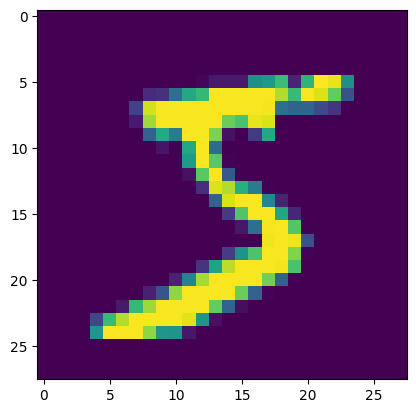

In [26]:
plt.imshow(numpy_img);

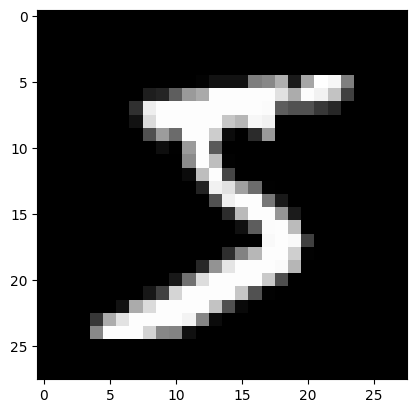

In [27]:
plt.imshow(numpy_img, cmap='gray');

Отрисовка заданной цифры:

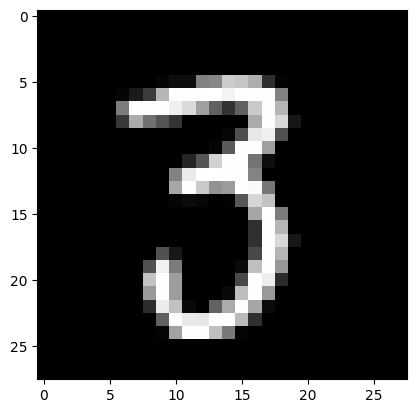

In [28]:
# случайный индекс от 0 до размера тренировочной выборки
i = np.random.randint(low=0, high=60000)

plt.imshow(trainloader.dataset.train_data[i].numpy(), cmap='gray');

Как итерироваться по данным с помощью `loader'`а? Очень просто:

In [29]:
for data in trainloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
   

То есть мы имеем дело с кусочками данных размера batch_size (в данном случае = 4), причём в каждом батче есть как объекты, так и ответы на них (то есть и $X$, и $y$).

Теперь вернёмся к тому, что в PyTorch есть две "парадигмы" построения нейросетей -- `Functional` и `Seuquential`. Со второй мы уже хорошенько разобрались в предыдущих ноутбуках по нейросетям, теперь мы испольузем именно `Functional` парадигму, потому что при построении свёрточных сетей это намного удобнее:

In [30]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [31]:
# ЗАМЕТЬТЕ: КЛАСС НАСЛЕДУЕТСЯ ОТ nn.Module
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet, self).__init__()

        # Первый свёрточный слой:
        # in_channels=1: количество входных каналов (для MNIST это 1, так как изображения черно-белые)
        # out_channels=6: количество выходных каналов (фильтров)
        # kernel_size=5: размер ядра свертки (5x5)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)

        # Слой подвыборки (пулинга):
        # kernel_size=2: размер окна пулинга (2x2)
        # stride=2: шаг окна пулинга (2 пикселя)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Второй свёрточный слой:
        # in_channels=6: количество входных каналов (равно количеству выходных каналов первого слоя)
        # out_channels=16: количество выходных каналов (фильтров)
        # kernel_size=5: размер ядра свертки (5x5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        # Полносвязные (линейные) слои:
        # !!! Размер входного тензора для первого линейного слоя должен быть известен заранее.
        # После двух свёрток и пулингов размер изображения становится 4x4, а количество каналов — 16.
        # Поэтому входной размер равен 4 * 4 * 16 = 256.
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  # Первый полносвязный слой
        self.fc2 = nn.Linear(120, 84)          # Второй полносвязный слой
        self.fc3 = nn.Linear(84, 10)           # Третий полносвязный слой (выходной слой)

    def forward(self, x):
        # Прямой проход через первый свёрточный слой:
        # Применяем ReLU (функция активации) и затем пулинг
        x = self.pool(F.relu(self.conv1(x)))

        # Прямой проход через второй свёрточный слой:
        # Применяем ReLU и затем пулинг
        x = self.pool(F.relu(self.conv2(x)))

        # !!! Переводим тензор в одномерный вектор для подачи в полносвязные слои
        # Размерность тензора перед этой операцией должна быть известна заранее.
        # Например, если размер тензора после второго пулинга равен [batch_size, 16, 4, 4],
        # то его можно "развернуть" в вектор размером [batch_size, 4 * 4 * 16].
        x = x.view(-1, 4 * 4 * 16)  # !!! Разворачиваем тензор

        # Прямой проход через полносвязные слои:
        # Применяем ReLU к выходам первого и второго полносвязных слоев
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Выходной слой (без активации, так как CrossEntropyLoss добавляет Softmax)
        x = self.fc3(x)
        return x

In [32]:
# Создание экземпляра модели SimpleConvNet
net = SimpleConvNet()

# Вывод сводки архитектуры модели с использованием summary из библиотеки torchsummary
summary(net.cuda(), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [33]:
# Создаем пустой список для хранения батча данных
batch = []

# Получаем один батч данных из загрузчика trainloader
batch = next(iter(trainloader))

# Прогоняем данные через модель net
net.forward(torch.FloatTensor(batch[0]).cuda())

tensor([[-0.0262,  0.0704,  0.0223, -0.0558,  0.0355,  0.0057, -0.0788,  0.1055,
          0.1264, -0.0036],
        [-0.0204,  0.0654,  0.0212, -0.0554,  0.0308,  0.0061, -0.0786,  0.1101,
          0.1244, -0.0022],
        [-0.0227,  0.0738,  0.0284, -0.0520,  0.0339,  0.0025, -0.0821,  0.1015,
          0.1311, -0.0117],
        [-0.0218,  0.0665,  0.0257, -0.0563,  0.0353,  0.0009, -0.0783,  0.1066,
          0.1291, -0.0071]], device='cuda:0', grad_fn=<AddmmBackward0>)

**Важное примечание:** Вы можете заметить, что в строчках с `#!!!` есть не очень понятный сходу 4 `*` 4 `*` 16. Это -- размерность картинки перед FC-слоями (H x W x C), тут её приходиться высчитывать вручную (в Keras, например, `.Flatten()` всё делает за Вас). Однако есть один *лайфхак* -- просто сделайте в `forward()` `print(x.shape)` (закомментированная строка). Вы увидите размер `(batch_size, C, H, W)` -- нужно перемножить все, кроме первого (batch_size), это и будет первая размерность `Linear()`, и именно в C * H * W нужно "развернуть" x перед подачей в `Linear()`.  

То есть нужно будет запустить цикл с обучением первый раз с `print()` и сделать после него `break`, посчитать размер, вписать его в нужные места и стереть `print()` и `break`.

Код обучения слоя:

In [34]:
from tqdm import tqdm_notebook

In [35]:
# объявляем сеть
net = SimpleConvNet().to(device)

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
losses = []

In [36]:
# Инициализация счетчиков
cnt = 0  # Общий счетчик итераций (батчей)
temp = 0  # Счетчик для подсчета, сколько раз выполнилось условие i % 2000 == 1999

# Цикл по всем батчам данных из trainloader с использованием tqdm_notebook для отображения прогресса
for i, batch in enumerate(tqdm_notebook(trainloader)):
    # Разделяем текущий батч на входные данные (X_batch) и метки классов (y_batch)
    X_batch, y_batch = batch

    # Обновляем общий счетчик итераций
    cnt = i

    # Проверяем условие: если номер итерации минус 1 делится на 2000 без остатка
    if i % 2000 == 1999:
        temp += 1  # Увеличиваем счетчик temp

# Выводим значения счетчиков
cnt, temp

<ipython-input-36-5e2e5bf7ad9c>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

(14999, 7)

<ipython-input-37-8c06baa20202>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(2)):


  0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-37-8c06baa20202>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.082
[1,  4000] loss: 0.392
[1,  6000] loss: 0.308
[1,  8000] loss: 0.282
[1, 10000] loss: 0.234
[1, 12000] loss: 0.207
[1, 14000] loss: 0.183


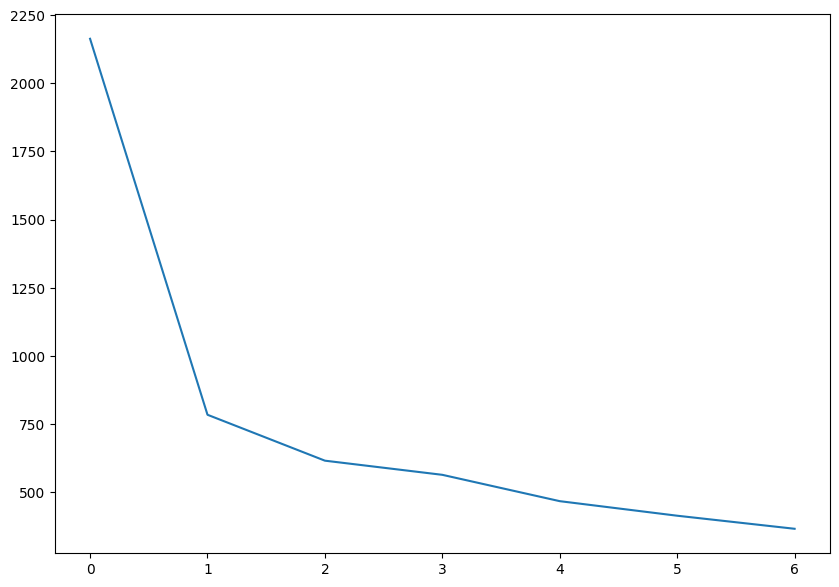

  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.168
[2,  4000] loss: 0.142
[2,  6000] loss: 0.123
[2,  8000] loss: 0.125
[2, 10000] loss: 0.117
[2, 12000] loss: 0.111
[2, 14000] loss: 0.102
Обучение закончено


In [37]:
# Создаем фигуру для визуализации графика потерь
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)  # Добавляем одну область для графика

# Итерируемся по эпохам (в данном случае 2 эпохи)
for epoch in tqdm_notebook(range(2)):

    running_loss = 0.0  # Переменная для накопления потерь внутри эпохи

    # Итерируемся по всем батчам данных из trainloader
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # Разделяем текущий батч на входные данные (X_batch) и метки классов (y_batch)
        X_batch, y_batch = batch

        # Обнуляем градиенты оптимизатора перед вычислением новых градиентов
        optimizer.zero_grad()

        # Прямой проход: получаем предсказания модели для текущего батча
        y_pred = net(X_batch.to(device))

        # Вычисляем функцию потерь (loss) между предсказаниями и истинными метками
        loss = loss_fn(y_pred, y_batch.to(device))

        # Обратное распространение ошибки: вычисляем градиенты
        loss.backward()

        # Обновляем параметры модели с помощью оптимизатора
        optimizer.step()

        # Накапливаем значение потерь для текущей эпохи
        running_loss += loss.item()

        # Выводим среднее значение потерь каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss)  # Сохраняем накопленные потери
            running_loss = 0.0  # Обнуляем накопленные потери для следующих 2000 батчей

    # Очищаем график для обновления
    ax.clear()

    # Строим график потерь
    ax.plot(np.arange(len(losses)), losses)
    plt.show()  # Отображаем график

# Выводим сообщение о завершении обучения
print('Обучение закончено')

Протестируем на всём тестовом датасете, используя метрику accuracy_score:

In [38]:
# Создаем списки для хранения количества правильных предсказаний и общего количества примеров для каждого класса
class_correct = list(0. for i in range(10))  # Список для подсчета правильных предсказаний
class_total = list(0. for i in range(10))    # Список для подсчета общего количества примеров

# Отключаем вычисление градиентов, так как мы тестируем модель (нет необходимости в обратном распространении)
with torch.no_grad():
    # Итерируемся по всем батчам данных из testloader
    for data in testloader:
        # Разделяем текущий батч на входные данные (images) и метки классов (labels)
        images, labels = data

        # Получаем предсказания модели для текущего батча
        y_pred = net(images.to(device))

        # Находим индексы максимальных значений в выходах модели (предсказанные классы)
        _, predicted = torch.max(y_pred, 1)

        # Сравниваем предсказанные классы с истинными метками
        c = (predicted.cpu().detach() == labels)  # c - булевый тензор, где True означает правильное предсказание

        # Обновляем счетчики для каждого класса
        for i in range(4):  # Размер батча равен 4
            label = labels[i]  # Получаем истинный класс текущего примера
            class_correct[label] += c[i].item()  # Увеличиваем счетчик правильных предсказаний для этого класса
            class_total[label] += 1  # Увеличиваем общий счетчик примеров для этого класса

# Выводим точность для каждого класса
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i],  # Название класса
        100 * class_correct[i] / class_total[i]  # Точность в процентах
    ))

Accuracy of     0 : 98 %
Accuracy of     1 : 98 %
Accuracy of     2 : 97 %
Accuracy of     3 : 96 %
Accuracy of     4 : 96 %
Accuracy of     5 : 97 %
Accuracy of     6 : 98 %
Accuracy of     7 : 95 %
Accuracy of     8 : 95 %
Accuracy of     9 : 96 %
